<a href="https://colab.research.google.com/github/TristanDelgado/Intro-To-Machine-Learning/blob/main/Week_7_discussion_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 7 Discussion problem - Problem 1: Page 511 Ex #12.1

## Instructions

12.1 (WEB SCRAPING WITH THE REQUESTS AND BEAUTIFUL SOUP LIBRARIES)

Web pages are excellent sources of text to use in NLP tasks. In the following IPython session, you’ll use the requests library to download the www.python.org home page’s content. This is called web scraping. You’ll then use the Beautiful Soup library37 to extract only the text from the page. Eliminate the stop words in the resulting text, then use the wordcloud module to create a word cloud based on the text.

```
In [1]: import requests

In [2]: response = requests.get('https://www.python.org')

In [3]: response.content  # gives back the page's HTML

In [4]: from bs4 import BeautifulSoup

In [5]: soup = BeautifulSoup(response.content, 'html5lib')

In [6]: text = soup.get_text(strip=True)  # text without tags
```

In the preceding code, snippets [1]–[3] get a web page. The get function receives a URL as an argument and returns the corresponding web page as a Response object. The Response’s content property contains the web page’s content. Snippets [4]–[6] get only the web page’s text. Snippet [5] creates a BeautifulSoup object to process the text in response.content. BeautifulSoup method get_text with the keyword argument strip=True returns just the text of the web page without its structural information that your web browser uses to display the web page.

## Solution

In [1]:
# Get initial text from www.python.org
import requests
from bs4 import BeautifulSoup

response = requests.get("https://www.python.org")
soup = BeautifulSoup(response.content, 'html5lib')
text = soup.get_text(strip=True)

In [2]:
# Clean the stopwords from the text
from nltk.corpus import stopwords
from nltk import downloader
from textblob import TextBlob

downloader.download("stopwords")
downloader.download("punkt_tab")

stopwords = stopwords.words("english")

blob = TextBlob(text)

cleanedText = [word for word in blob.words if word not in stopwords]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:
# Install the necessary pip library
!pip install wordcloud

<ipython-input-4-0639d09805eb>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_image = imageio.imread("/content/python-logo.png") # I uploaded the Python logo for my png template


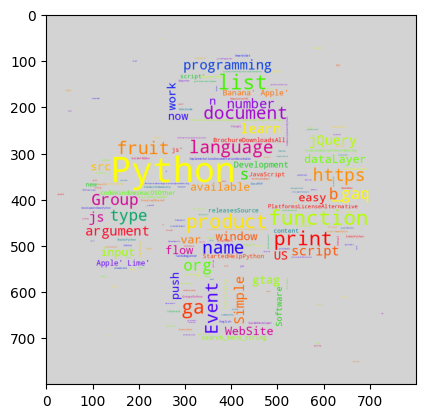

In [4]:
# Visualize data in a wordcloud
import imageio
from wordcloud import WordCloud
import matplotlib.pyplot as plt

mask_image = imageio.imread("/content/python-logo.png") # I uploaded the Python logo for my png template
wordcloud = WordCloud(colormap='prism', mask=mask_image, background_color='lightgray')
wordcloud = wordcloud.generate(text)
plt.imshow(wordcloud)